[[[ 97  56 266  54]]

 [[ 74 260 360 257]]

 [[322  57 372 227]]

 [[ 53 237  94  61]]]


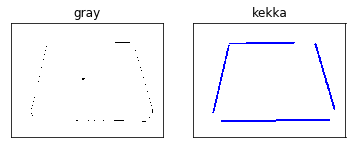

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon

#画像読み込み
img = cv2.imread("Path")
kuhaku = cv2.imread("kuhaku.jpg")
kuhaku_sm = cv2.imread("kuhaku_sm.jpg")

#色で２値化
nichika = cv2.inRange(img,(40,70,80),(135,165,185))



#フィルター
kernel = np.ones((150,150),np.float32)/22500
boya1 = cv2.filter2D(nichika,-1,kernel)
# boya2 = cv2.blur(boya1,(100,100))

#フィルターをかけまくる事により、２値化でロゴも消す。
th, nichika2 = cv2.threshold(boya1, 10, 255, cv2.THRESH_BINARY)

#枠線を出力
label, contours, hierarchy = cv2.findContours(nichika2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
kekka = cv2.drawContours(kuhaku, contours, -1, (0,0,0), 3)

#縮小からの直線検出を用いる。
gray = cv2.cvtColor(kekka, cv2.COLOR_BGR2GRAY)
gray2 = cv2.bitwise_not(gray)
height = gray2.shape[0]
width = gray2.shape[1]
gray3 = cv2.resize(gray2,(int(width*0.1),int(height*0.1)))


lines = cv2.HoughLinesP(gray3, rho=1, theta=np.pi/560, threshold=70, minLineLength=160, maxLineGap=300)

print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]

    # 赤線を引く
    keka_lines = cv2.line(kuhaku_sm, (x1,y1), (x2,y2), (0,0,255), 3)
    cv2.imwrite("wakusen.jpg", keka_lines)

plt.subplot(121), plt.imshow(gray, cmap = "gray")
plt.title("gray"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(keka_lines, cmap="gray")
plt.title("kekka"), plt.xticks([]), plt.yticks([])

cv2.imwrite("nichika.jpg", nichika)
cv2.imwrite("boya1.jpg", boya1)
cv2.imwrite("gray.jpg", gray)
cv2.imwrite("nichika2.jpg", nichika2)
cv2.imwrite("kekka.jpg", keka_lines)

plt.show()